In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def axis_helper(axis, limits):
    axis.set_xlim(limits); axis.set_xticks([])
    axis.set_ylim(limits); axis.set_yticks([])
    axis.set_aspect("equal")

In [4]:
D = np.array([[3, 5], [4, 2]])
x, y = D[:, 0], D[:, 1]

[(1.0, array([4., 1.]), 5.0, 17.0, 4.123105625617661),
 (2.0, array([3., 0.]), 3.0, 9.0, 3.0),
 (3.0, array([ 2., -1.]), 1.0, 5.0, 2.23606797749979),
 (3.5, array([ 1.5, -1.5]), 0.0, 4.5, 2.1213203435596424),
 (4.0, array([ 1., -2.]), -1.0, 5.0, 2.23606797749979),
 (5.0, array([ 0., -3.]), -3.0, 9.0, 3.0)]

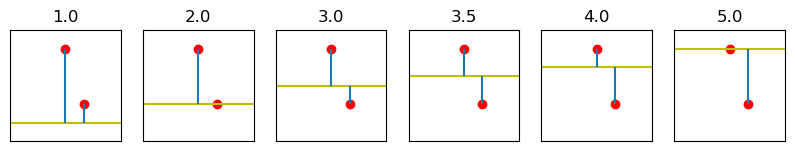

In [5]:
horizontal_lines = np.array([1, 2, 3, 3.5, 4, 5])
results = []
fig, axes = plt.subplots(1, 6, figsize=(10, 5))
for h_line, ax in zip(horizontal_lines, axes.flat):
#     styling the plot
    axis_helper(ax, (0, 6))
    ax.set_title(str(h_line))
    
#     plotting the data
    ax.plot(x, y, "ro")
    
#     plotting the prediction line
    ax.axhline(h_line, color="y")
    
#     plotting the errors
    predictions = h_line
    ax.vlines(x, predictions, y)
    
#     calculate the error amounts and their sum of squares
    errors = y - predictions
    sse = np.dot(errors, errors)
#     sse stands for sum of squared errors

    results.append((predictions, errors, errors.sum(), sse, np.sqrt(sse)))
results

In [6]:
col_labels = "Prediction", "Errors", "Sum", "SSE", "Distance"
display(pd.DataFrame.from_records(results, columns=col_labels, index="Prediction"))

,Errors,Sum,SSE,Distance
Prediction,,,,
1.0,"[4.0, 1.0]",5.0,17.0,4.123106
2.0,"[3.0, 0.0]",3.0,9.0,3.000000
3.0,"[2.0, -1.0]",1.0,5.0,2.236068
3.5,"[1.5, -1.5]",0.0,4.5,2.121320
4.0,"[1.0, -2.0]",-1.0,5.0,2.236068
5.0,"[0.0, -3.0]",-3.0,9.0,3.000000


In [7]:
def process(D, model, ax):
    x, y = D[:, 0], D[:, 1]
    m, b = model
    
#     styling
    axis_helper(ax, (0, 8))
    
#     plotting the data
    ax.plot(x, y, "ro")
    
#     plotting the prediction line
    helper_xs = np.array([0, 8])
    helper_line = m * helper_xs + b
    ax.plot(helper_xs, helper_line, color="y")
    
#     plotting the errors
    predictions = m * x + b
    ax.vlines(x, predictions, y)
    
#     calculating the error amounts
    errors = y - predictions
    
#     tuple-ing up the results
    sse = np.dot(errors, errors)
    return (errors, errors.sum(), sse, np.sqrt(sse))


,Raw errors,Sum,SSE,TotDist
0,"[2, -2]",0,8,2.828427
1,"[1, -3]",-2,10,3.162278
2,"[0, -4]",-4,16,4.000000
3,"[0, -2]",-2,4,2.000000
4,"[0, 0]",0,0,0.000000


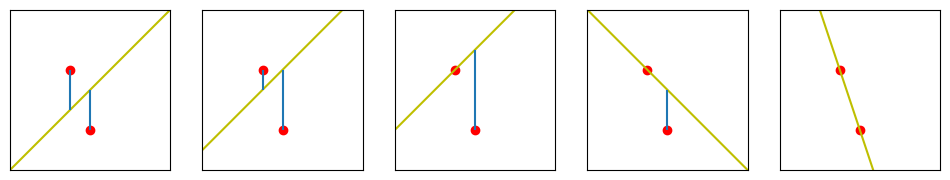

In [8]:
D = np.array([[3, 5], [4, 2]])
lines_mb = np.array([
    [1, 0],
    [1, 1],
    [1, 2],
    [-1, 8],
    [-3, 14]
])
col_labels = ("Raw errors", "Sum", "SSE", "TotDist")
results = []

# plotting occurs in process
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
records = [process(D, mod, ax) for mod, ax in zip(lines_mb, axes.flat)]
df = pd.DataFrame.from_records(records, columns=col_labels)
display(df)

In [32]:
# performing optimization to pick the best possible line.
tgt = np.array([3, 5, 8, 10, 12, 15])

In [33]:
# 1) Random Guess - Try lots of possiblities at random, take the best one.
num_guesses = 10
results = []

for g in range(num_guesses):
    guess = np.random.uniform(low=tgt.min(), high=tgt.max())
    total_dist = np.sum((tgt - guess) ** 2)
    results.append((total_dist, guess))
best_guess = sorted(results)[0][1]
best_guess
    

9.000929466278006

In [35]:
# 2) Random Step - Try one line --- pick an m and a b --- at random, make several random adjustments, pick one adjustment that helps the most.
num_steps = 100
step_size = 0.5

best_guess = np.random.uniform(low=tgt.min(), high=tgt.max())
best_dist = np.sum((tgt - best_guess) ** 2)

for s in range(num_steps):
    new_guess = best_guess + (np.random.choice([+1, -1]) * step_size)
    